# KKN
## K-Nearest Neighbors

- Klasifikasi suatu titik data, berdasarkan bagaimana titik-titik data di sekitarnya diklasifikasikan.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(iris['data'], columns=['SL','SW','PL','PW'])
df['target'] = iris['target']
df

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


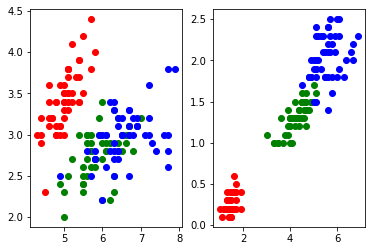

In [10]:
plt.subplot(121)
plt.plot(df['SL'][df['target']==0], df['SW'][df['target']==0], 'ro')
plt.plot(df['SL'][df['target']==1], df['SW'][df['target']==1], 'go')
plt.plot(df['SL'][df['target']==2], df['SW'][df['target']==2], 'bo')

plt.subplot(122)
plt.plot(df['PL'][df['target']==0], df['PW'][df['target']==0], 'ro')
plt.plot(df['PL'][df['target']==1], df['PW'][df['target']==1], 'go')
plt.plot(df['PL'][df['target']==2], df['PW'][df['target']==2], 'bo')


In [12]:
xtr, xts, ytr, yts = train_test_split(df[['SL','SW','PL','PW']], df['target'], test_size =.2)

In [14]:
knc = KNeighborsClassifier()
knc.fit(xtr,ytr)
# minkowski, p = 2 -> euclidean

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
knc.predict(xts)

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0,
       1, 0, 2, 0, 2, 1, 1, 0])

In [17]:
np.array(yts.to_list())

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 0])

In [21]:
np.array(knc.predict_proba(xts).tolist())

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [24]:
#n_neighbors berapa data terdekat
nn = NearestNeighbors(n_neighbors=1)
nn.fit(xtr)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                 radius=1.0)

In [30]:
nn.kneighbors([xts.iloc[0]])

SL    4.5
SW    2.3
PL    1.3
PW    0.3
Name: 41, dtype: float64

In [28]:
xts.iloc[0]

SL    4.9
SW    3.1
PL    1.5
PW    0.2
Name: 34, dtype: float64

In [27]:
#Urutan data ke-43
xtr.iloc[43]

SL    4.9
SW    3.1
PL    1.5
PW    0.1
Name: 9, dtype: float64

In [ ]:
# nn.kneighbors([[0,0,0,0]])
# xtr.iloc[100]
melihat objek di titik2 tertentu

### Mencari K Value
Lebih baik ganjil
- 1. sqrt(n): akar dari total data point untuk trainning
- 2. pilih nilai ganjil

In [31]:
k_val = round(len(xtr)** .5)
k_val

11

In [32]:
knc2 = KNeighborsClassifier(n_neighbors=11)
knc2.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [33]:
knc2.predict(xts)

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 0])

In [34]:
np.array(yts.to_list())

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0,
       1, 0, 1, 0, 2, 1, 1, 0])

In [35]:
knc.score(xts,yts)

0.9

In [36]:
knc2.score(xts,yts)

0.9333333333333333

In [37]:
print(knc.predict([[4.6, 2, 0.2, 1]]))
print(knc2.predict([[4.6, 2, 0.2, 1]]))

[0]
[0]


In [44]:
print(classification_report(yts, knc.predict(xts)))

precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.83      0.87        12
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [45]:
print(classification_report(yts, knc2.predict(xts)))

precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        12
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

